In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
final_performance_school_dropout = pd.read_csv('data/final_performance_school_dropout.csv')

In [3]:
final_performance_school_dropout

,Ano,Rede,Localização,1EF,2EF,3EF,4EF,5EF,6EF,7EF,8EF,9EF,Total - EF,1EM,2EM,3EM,4EM,Não-Seriado,Total - EM
0,2007,Rural,Estadual,3.600000,6.3,4.1,4.2,4.9,7.4,6.9000,6.5,6.7,6.0,18.3,14.1,10.2,10.2000,15.500000,14.9
1,2007,Rural,Federal,1.356911,0.0,0.0,0.0,0.0,0.0,3.0396,4.8,0.0,1.4,5.0,1.8,0.8,5.6944,3.000000,2.9
2,2007,Rural,Municipal,4.300000,7.5,5.2,5.6,5.8,11.3,9.6000,9.7,8.3,7.0,19.0,13.4,8.4,3.7000,11.700000,14.7
3,2007,Rural,Particular,1.300000,2.5,1.8,1.3,1.2,3.1,2.2000,2.1,1.2,1.9,2.7,1.2,0.8,2.2000,9.499585,1.7
4,2007,Rural,Publico,4.300000,7.4,5.1,5.5,5.7,10.6,9.1000,9.0,7.9,6.9,17.8,13.5,9.6,7.2000,11.800000,14.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2020,Privada,Urbana,5.000000,3.1,2.4,1.9,1.4,1.1,0.9000,0.7,0.6,2.0,0.5,0.4,0.2,13.8000,5.800000,0.4
247,2020,Privada,Rural,3.600000,2.1,2.5,2.0,1.3,1.4,1.0000,1.0,1.4,1.9,5.6,3.1,3.1,4.2000,2.000000,4.2
248,2020,Pública,Total,0.500000,0.4,0.6,0.6,0.7,1.3,1.3000,1.2,1.1,0.8,2.9,2.3,2.1,7.8000,2.300000,2.6
249,2020,Pública,Urbana,0.500000,0.4,0.5,0.5,0.6,1.3,1.2000,1.0,1.0,0.8,2.9,2.3,2.2,7.8000,2.500000,2.5


In [4]:
final_performance_school_dropout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ano          251 non-null    int64  
 1   Rede         251 non-null    object 
 2   Localização  251 non-null    object 
 3   1EF          251 non-null    float64
 4   2EF          251 non-null    float64
 5   3EF          251 non-null    float64
 6   4EF          251 non-null    float64
 7   5EF          251 non-null    float64
 8   6EF          251 non-null    float64
 9   7EF          251 non-null    float64
 10  8EF          251 non-null    float64
 11  9EF          251 non-null    float64
 12  Total - EF   251 non-null    float64
 13  1EM          251 non-null    float64
 14  2EM          251 non-null    float64
 15  3EM          251 non-null    float64
 16  4EM          251 non-null    float64
 17  Não-Seriado  251 non-null    float64
 18  Total - EM   251 non-null    float64
dtypes: float

### H6.The school dropout rate in private schools was higher than in public schools

In [5]:
df_dropout_rede = pd.DataFrame([row for i, row in final_performance_school_dropout.iterrows() 
                               if (row['Rede'] in ['Pública', 'Privada'])])
df_dropout_rede['Rede - Localização'] = df_dropout_rede['Localização'] + '_' + df_dropout_rede['Rede'] 

##### Gráfico com os dados de abandono em escolas públicas e particulares (Ensino Fundamental)

Text(0.5, 1.0, 'Total de Abandonos do Ensino Fundamental por Rede')

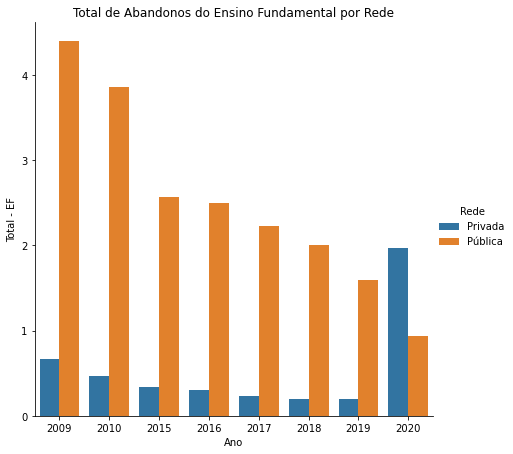

In [6]:
sns.catplot(x="Ano", y="Total - EF", hue="Rede", kind="bar", data=df_dropout_rede, height=6, aspect=1, ci=None)
plt.title("Total de Abandonos do Ensino Fundamental por Rede")

Text(0.5, 1.0, 'Total de Abandonos do Ensino Fundamental por Rede e Localização')

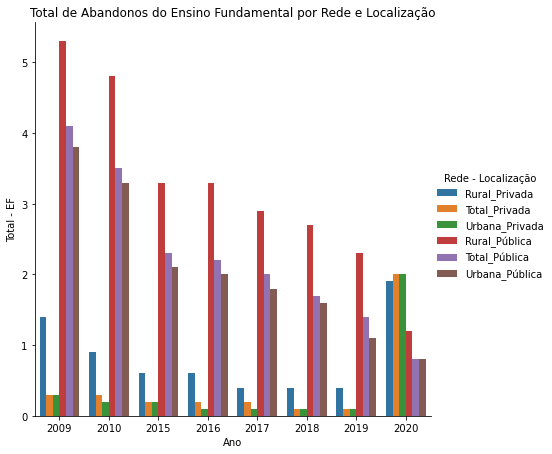

In [7]:
sns.catplot(x="Ano", y="Total - EF", hue="Rede - Localização", kind="bar", data=df_dropout_rede, height=6, aspect=1)
plt.title("Total de Abandonos do Ensino Fundamental por Rede e Localização")

In [8]:
df_dropout_rede.columns

Index(['Ano', 'Rede', 'Localização', '1EF', '2EF', '3EF', '4EF', '5EF', '6EF',
       '7EF', '8EF', '9EF', 'Total - EF', '1EM', '2EM', '3EM', '4EM',
       'Não-Seriado', 'Total - EM', 'Rede - Localização'],
      dtype='object')

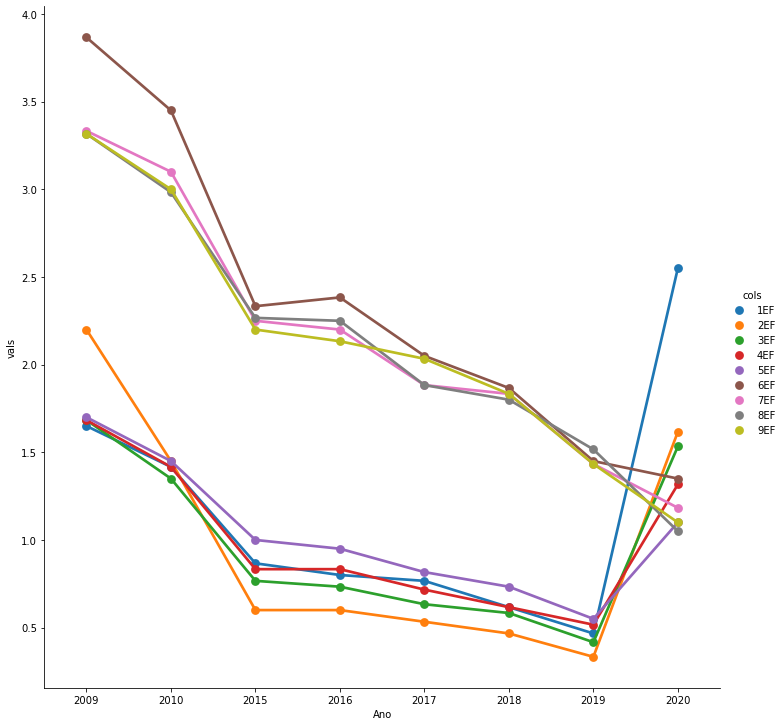

In [9]:
columns_f = ['Ano','1EF', '2EF', '3EF', '4EF', '5EF', '6EF', '7EF', '8EF', '9EF']
df_f = df_dropout_rede[columns_f].melt('Ano', var_name='cols',  value_name='vals')
g = sns.catplot(x="Ano", y="vals", hue='cols', data=df_f, height=10, aspect=1, kind='point', ci=None)

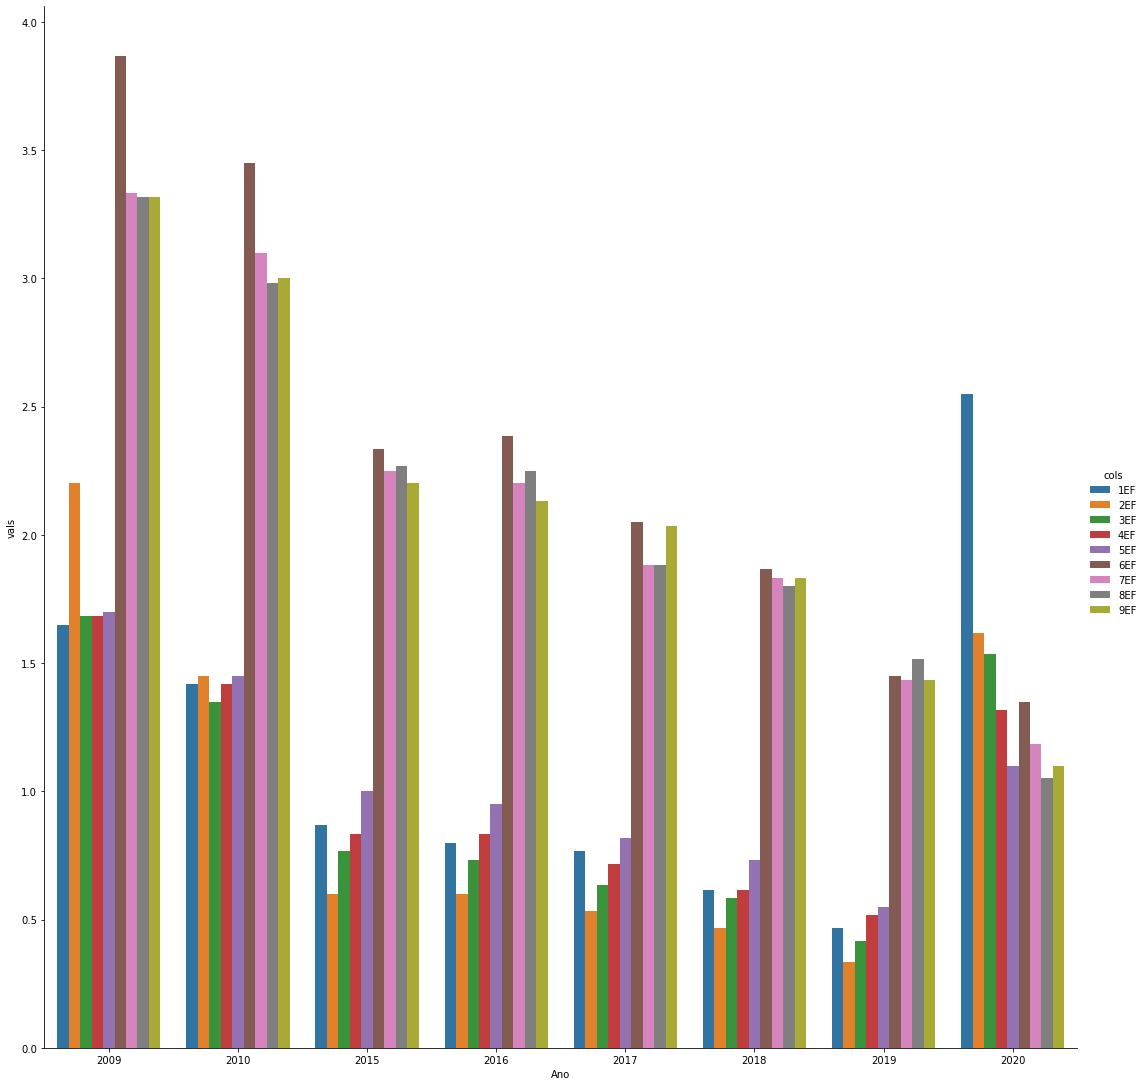

In [10]:
sns.catplot(x="Ano", y="vals", hue="cols", kind="bar", data=df_f,height=15, aspect=1, ci=None)

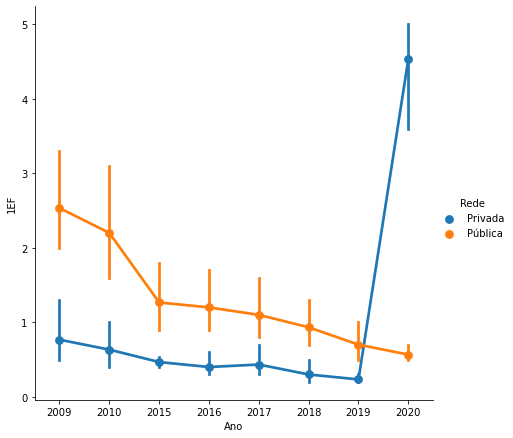

In [11]:
sns.catplot(x="Ano", y='1EF', hue="Rede", kind="point", data=df_dropout_rede, height=6, aspect=1)

##### Gráfico com os dados de abandono em escolas públicas e particulares (Ensino Médio)

Text(0.5, 1.0, 'Total de Abandonos do Ensino Médio por Rede')

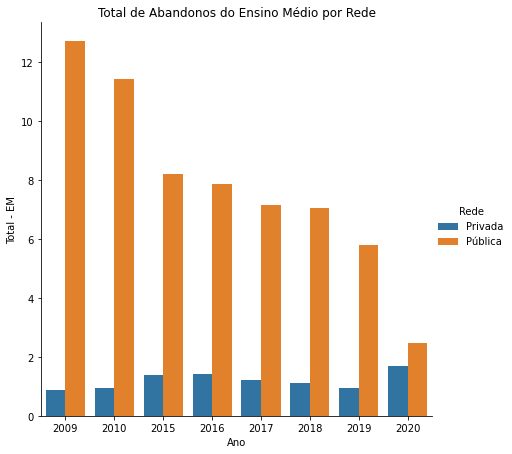

In [12]:
sns.catplot(x="Ano", y="Total - EM", hue="Rede", kind="bar", data=df_dropout_rede, height=6, aspect=1, ci=None)
plt.title("Total de Abandonos do Ensino Médio por Rede")

In [13]:
columns_m = ['Ano','1EM', '2EM', '3EM', '4EM', 'Não-Seriado']
df_m = df_dropout_rede[columns_m].melt('Ano', var_name='cols',  value_name='vals')

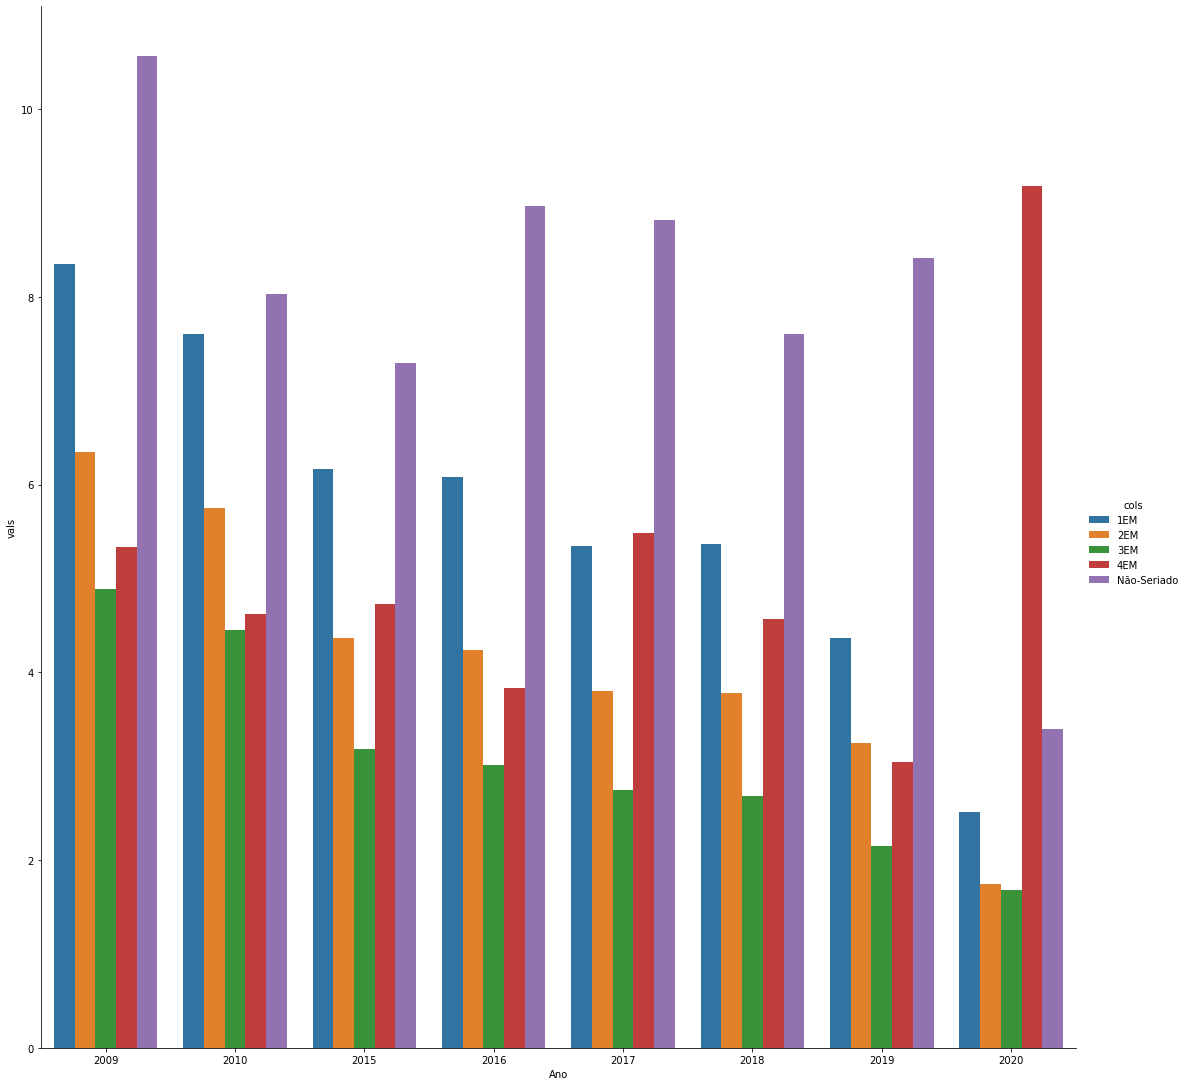

In [14]:
sns.catplot(x="Ano", y="vals", hue="cols", kind="bar", data=df_m,height=15, aspect=1, ci=None)

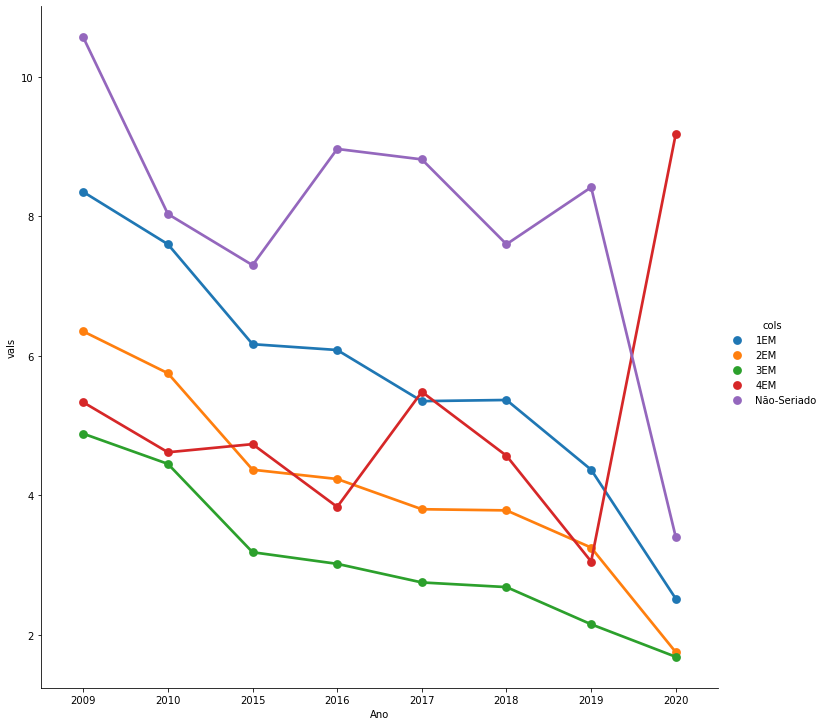

In [15]:
g = sns.catplot(x="Ano", y="vals", hue='cols', data=df_m, height=10, aspect=1, kind='point', ci=None)

### H7.The school dropout in rural areas was higher than in urban areas

In [16]:
df_dropout_loc = pd.DataFrame([row for i, row in final_performance_school_dropout.iterrows() 
                                  if (row['Localização'] in ['Rural', 'Urbana'])])
df_dropout_loc['Rede - Localização'] = df_dropout_loc['Localização'] + '_' + df_dropout_loc['Rede']

In [17]:
df_dropout_loc.columns

Index(['Ano', 'Rede', 'Localização', '1EF', '2EF', '3EF', '4EF', '5EF', '6EF',
       '7EF', '8EF', '9EF', 'Total - EF', '1EM', '2EM', '3EM', '4EM',
       'Não-Seriado', 'Total - EM', 'Rede - Localização'],
      dtype='object')

##### Gráfico com os dados de abandono em escolas zona urbana e zona rural (Ensino Fundamental)

Text(0.5, 1.0, 'Total de Abandonos do Ensino Fundamental por Localização')

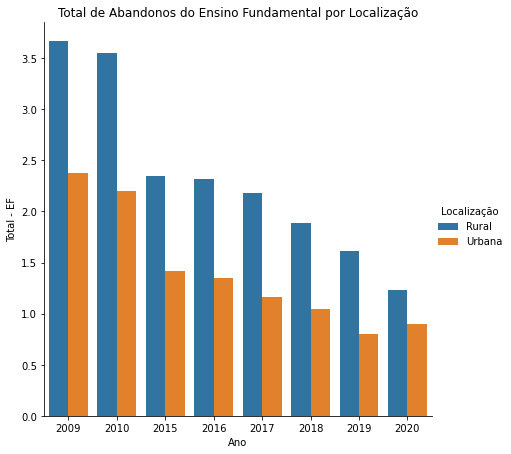

In [18]:
sns.catplot(x="Ano", y="Total - EF", hue="Localização", kind="bar", data=df_dropout_loc, height=6, aspect=1, ci=None)
plt.title("Total de Abandonos do Ensino Fundamental por Localização")

Text(0.5, 1.0, 'Total de Abandonos do Ensino Fundamental por Localização e Rede')

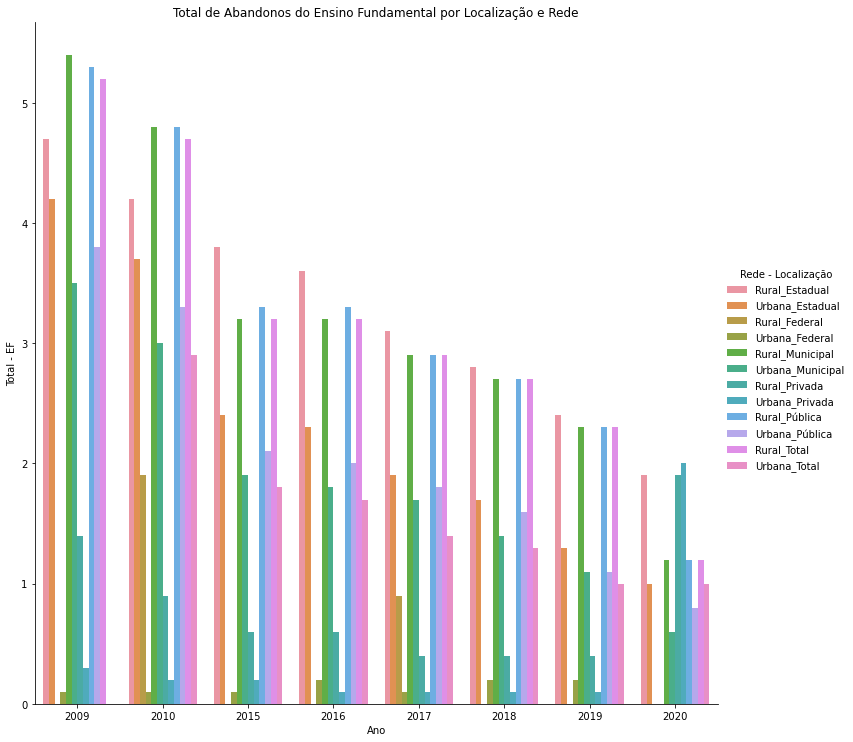

In [19]:
sns.catplot(x="Ano", y="Total - EF", hue="Rede - Localização", kind="bar", data=df_dropout_loc, height=10, aspect=1, ci=None)
plt.title("Total de Abandonos do Ensino Fundamental por Localização e Rede")

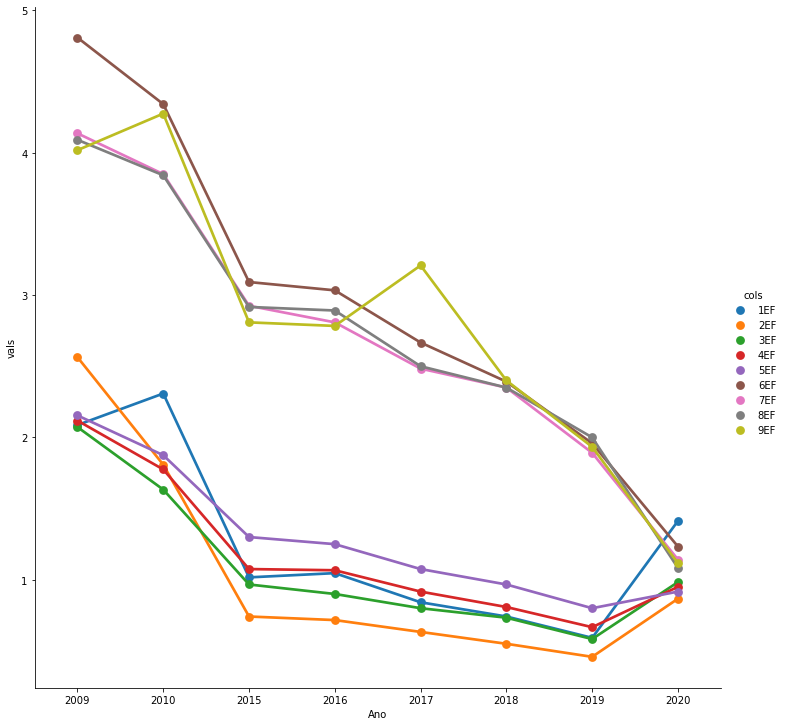

In [20]:
df_f_ = df_dropout_loc[columns_f].melt('Ano', var_name='cols',  value_name='vals')
g = sns.catplot(x="Ano", y="vals", hue='cols', data=df_f_, height=10, aspect=1, kind='point', ci=None)

##### Gráfico com os dados de abandono em escolas zona urbana e zona rural (Ensino Médio)

Text(0.5, 1.0, 'Total de Abandonos do Ensino Médio por Localização')

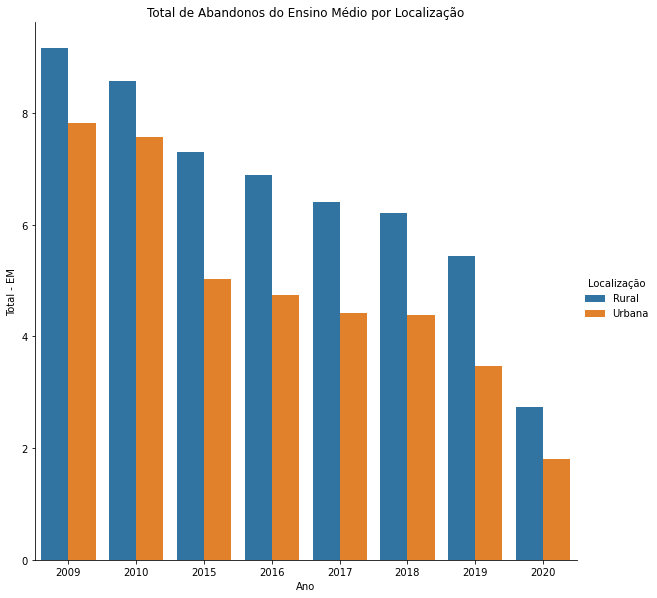

In [21]:
sns.catplot(x="Ano", y="Total - EM", hue="Localização", kind="bar", data=df_dropout_loc, height=8, aspect=1, ci=None)
plt.title("Total de Abandonos do Ensino Médio por Localização")

Text(0.5, 1.0, 'Total de Abandonos do Ensino Médio por Localização')

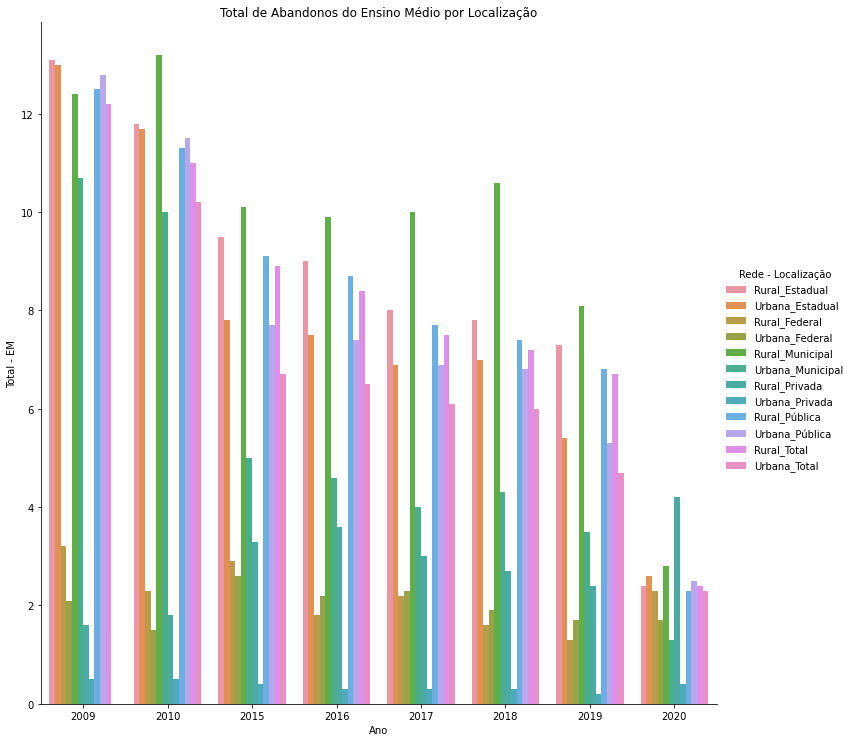

In [22]:
sns.catplot(x="Ano", y="Total - EM", hue="Rede - Localização", kind="bar", data=df_dropout_loc, height=10, aspect=1, ci=None)
plt.title("Total de Abandonos do Ensino Médio por Localização")

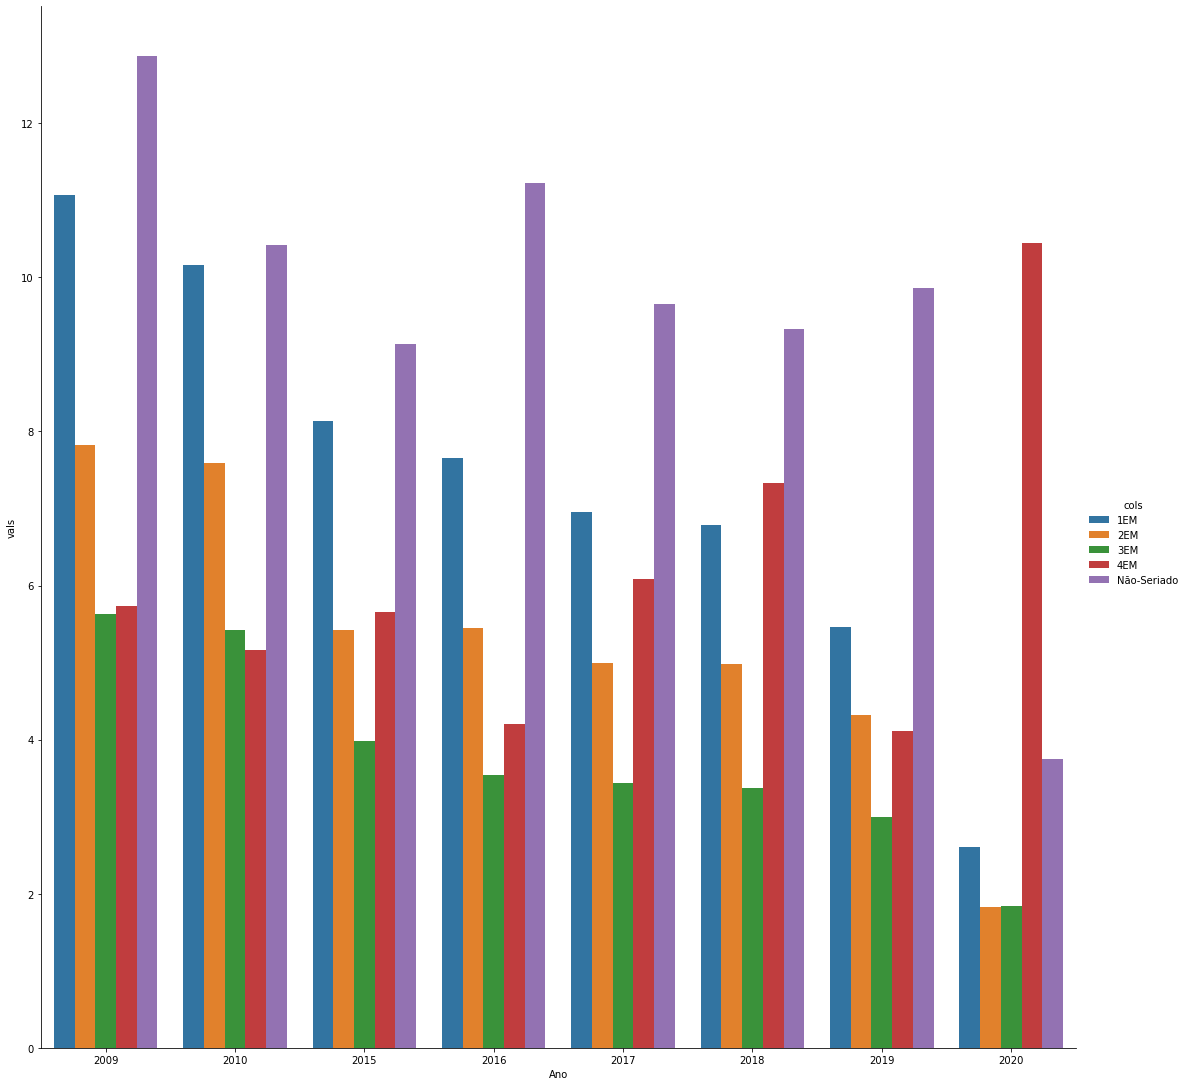

In [23]:
df_m_ = df_dropout_loc[columns_m].melt('Ano', var_name='cols',  value_name='vals')
sns.catplot(x="Ano", y="vals", hue="cols", kind="bar", data=df_m_,height=15, aspect=1, ci=None)

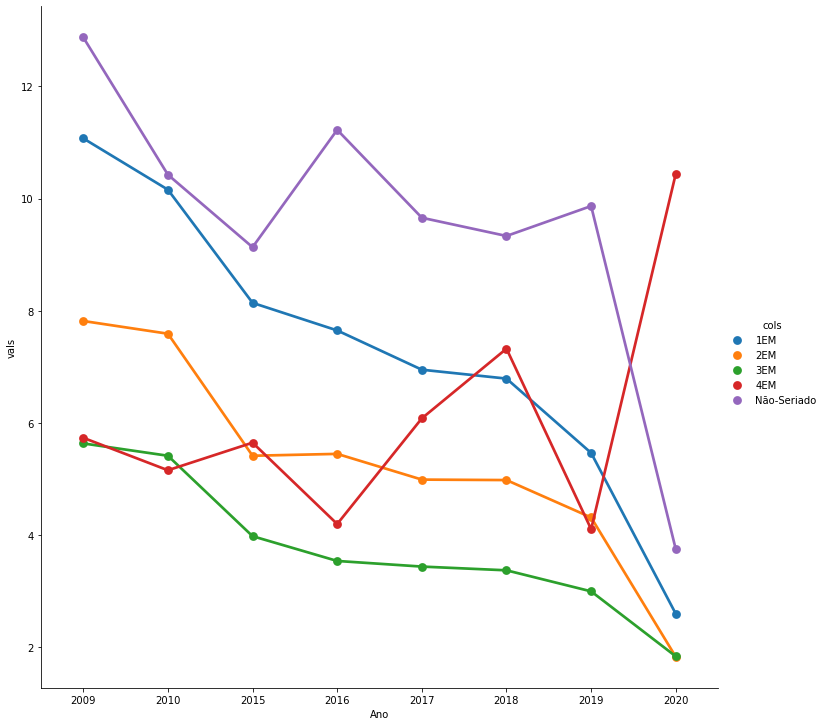

In [24]:
g = sns.catplot(x="Ano", y="vals", hue='cols', data=df_m_, height=10, aspect=1, kind='point', ci=None)